# Assignment 1
## Neural NetWork

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# 创建一个小的网络，使用 toy data 实现一下
# 我们需要设定随机数种子，用于重复实验
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std = 1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

## Forward pass

In [5]:
# 使用权重和偏差计算所有输入的得分
scores = net.loss(X)
print('Your sccores: ')
print(scores)
print('\n')
print('Correct scores: ')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print('\n')

# 两者的差异十分小 < 1e-7
print('Difference between your scores and correct scores: ')
print(np.sum(np.abs(scores - correct_scores)))

Your sccores: 
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]


Correct scores: 
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]


Difference between your scores and correct scores: 
3.680272093239262e-08


In [7]:
# 计算数据损失和正则化损失
loss, _ = net.loss(X, y, reg = 0.1)
correct_scores = 1.30378789133

print('Difference between your loss and corect loss:')
print(np.sum(np.abs(loss - correct_scores)))

Difference between your loss and corect loss:
1.7985612998927536e-13


# Backward pass

In [14]:
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [15]:
from cs231n.gradient_check import eval_numerical_gradient

# 使用数值梯度检查来确保我们的反向传播正常工作
# 如果实现正确，数值梯度和分析梯度之间的差异会小于 1e-8 （对 W1、W2、b1、b2 均是）
loss, grads = net.loss(X, y, reg = 0.1)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg = 0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose = False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


## Train the network on toy data

Final training loss:  0.017149607938732093


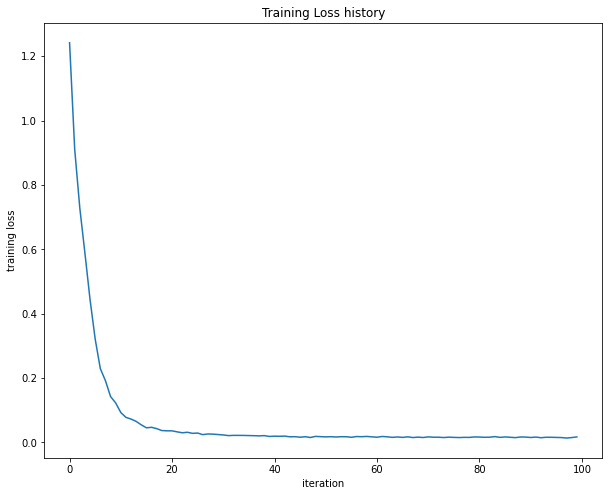

In [16]:
# 我们在 toy data 上面训练网络，可以得到低于 0.2 的损失值
net = init_toy_model()
stats = net.train(X, y, X, y, learning_rate = 1e-1, reg = 1e-5, num_iters = 100, verbose = False)
print('Final training loss: ', stats['loss_history'][-1])

plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Load the Data

In [18]:
# 开始加载 cifar-10 数据到我们的两层神经网络
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


## Train the network on cifar-10

In [19]:
# 为了训练我们的网络，我们将使用动量 SGD
# 此外，随着优化的进行，我们将调整学习率
# 在每个周期后，我通过乘以衰减率来降低学习率
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# 训练网络
stats = net.train(X_train, y_train, X_val, y_val, num_iters = 1000, batch_size = 200, learning_rate = 1e-4, learning_rate_decay = 0.95, reg = 0.5, verbose = True)

# 在验证集上做预测
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy', val_acc)

iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy 0.287


## Debug the training

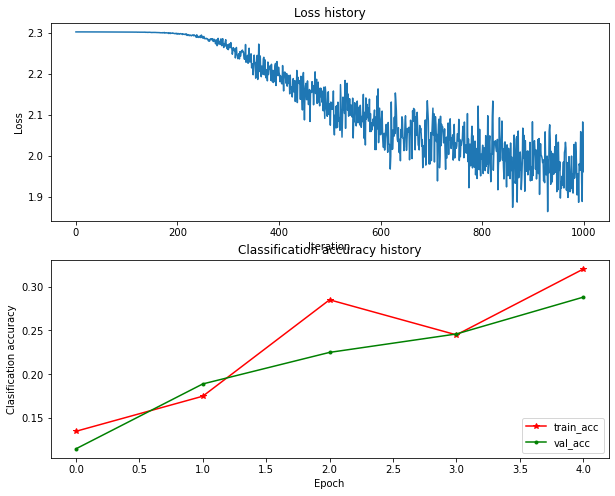

In [22]:
# 使用上面默认的参数，我们在验证集上能得到大约 0.29 的准确率，但是这远远不够
# 一种检查错误的方法是画出损失函数图像、训练集准确率图像和验证集准确率图像、
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], color = 'red', marker = '*')
plt.plot(stats['val_acc_history'], color = 'green', marker = '.')
plt.legend(["train_acc", "val_acc"], loc = 'lower right')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

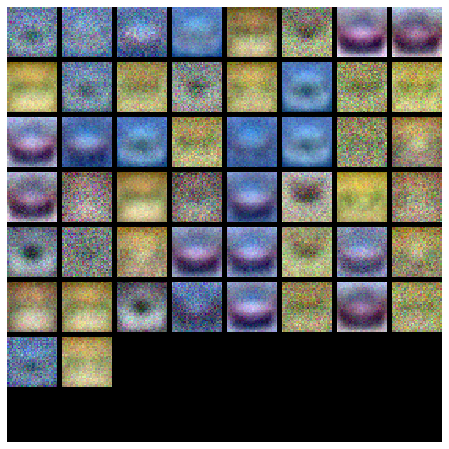

In [24]:
# 另外一种方法是可视化第一层神经网络学习到的权重。通常，在可视化数据上训练的网络，其第一层在可视化时会显示一些可见的结构
from cs231n.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding = 3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

## Tune hyperparameters

**哪里出错了？**

观察上面的可视化结果，我们发现损失函数或多或少的呈线性下降，这意味着学习率可能太小。另外，在 Classification accuracy history 中，训练数据和测试数据的准确率曲线之间并没有明显的分界，这意味着我们的模型容量太小，而我们必须增加模型的容量。另一方面，采用一个容量很大的模型，将会出现很多的过拟合，这可以通过观察训练数据准确率曲线和测试数据准确率曲线之间出现过大的分界而得出

**调优**

超参数调优和建立一个直觉告诉我们超参数是如何影响最终的结果，这两点是神经网络中很重要的一部分。这需要大量的实践经验。在下面的任务中，我们将采用不同的超参数组合进行实验，包括隐藏层大小、学习率、训练周期、正则化强度等。或许，也要考虑调整学习率的衰减系数，但是在默认值上我们必须先得到一个不错的结果

**近似结果**

我们通过调参可以得到一个在验证集上准确率高于 48% 的模型。最好的情况下，在验证机上可以达到 52%

In [27]:
best_net = None

hidden_size = [75, 100, 125]
results = {}
best_val_acc = 0
best_net = None

learning_rates = np.a
rray([0.7, 0.8, 0.9, 1.0, 1.1]) * 1e-3
regularization_strengths = [0.75, 1, 1.25]

print('Running')
for hs in hidden_size:
    for lr in learning_rates:
        for reg in regularization_strengths:
            print('.')
            net = TwoLayerNet(input_size, hs, num_classes)
            # Train the network
            stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1500, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg= reg, verbose=False)
            val_acc = (net.predict(X_val) == y_val).mean()
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_net = net         
            results[(hs,lr,reg)] = val_acc
print('\n')
print('Finished')
for hs,lr, reg in sorted(results):
    val_acc = results[(hs, lr, reg)]
    print('hs %d lr %e reg %e val accuracy: %f' % (hs, lr, reg,  val_acc))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val_acc)

Running


Finished
hs 75 lr 7.000000e-04 reg 7.500000e-01 val accuracy: 0.469000
hs 75 lr 7.000000e-04 reg 1.000000e+00 val accuracy: 0.485000
hs 75 lr 7.000000e-04 reg 1.250000e+00 val accuracy: 0.468000
hs 75 lr 8.000000e-04 reg 7.500000e-01 val accuracy: 0.485000
hs 75 lr 8.000000e-04 reg 1.000000e+00 val accuracy: 0.484000
hs 75 lr 8.000000e-04 reg 1.250000e+00 val accuracy: 0.465000
hs 75 lr 9.000000e-04 reg 7.500000e-01 val accuracy: 0.482000
hs 75 lr 9.000000e-04 reg 1.000000e+00 val accuracy: 0.485000
hs 75 lr 9.000000e-04 reg 1.250000e+00 val accuracy: 0.496000
hs 75 lr 1.000000e-03 reg 7.500000e-01 val accuracy: 0.493000
hs 75 lr 1.000000e-03 reg 1.000000e+00 val accuracy: 0.487000
hs 75 lr 1.000000e-03 reg 1.250000e+00 val accuracy: 0.479000
hs 75 lr 1.100000e-03 reg 7.500000e-01 val accuracy: 0.492000
hs 75 lr 1.100000e-03 reg 1.000000e+00 val accuracy: 0.482000
hs 75 lr 1.100000e-03 reg 1.250000e+00 val accuracy: 0.465000
hs 100 lr 7.000000e-04 reg 7.500000e-01 val accurac

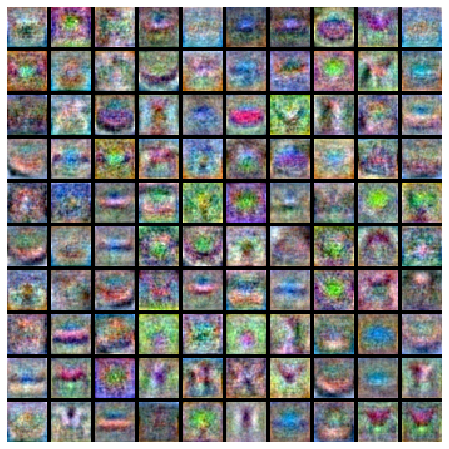

In [28]:
show_net_weights(best_net)

## Run on the test set

In [29]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.502
